<a target="_blank" href="https://colab.research.google.com/github/felicebenita99/Data-Science/blob/main/myproject-ipynb/social_media_ad_performance.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Social Media Ad Performance Prediction 📈

Data: Social Media Ad Performance datasets (Source: I created my own data set).<br/>
This dataset will include features such as ad budget, audience size, ad duration, target age group, platform, and visual type, and we’ll use these features to predict Conversions.

#### <ins>Created by: Felice Benita</ins>

#### Dataset: Social Media Ad Performance datasets (Source: I created my own data set)


##### Context
Many businesses use social media platforms like Facebook, Instagram, Twitter, and TikTok to reach target audiences and drive engagement or conversions through paid ads. Understanding what factors contribute to ad performance is crucial for maximizing return on investment (ROI).<br/>
Goal: Predict the number of conversions (click-throughs, sign-ups, etc.) on social media ads.

##### Objective
This analysis aims to predict the number of conversions (such as clicks, sign-ups, or purchases) based on various factors related to each ad. By identifying which variables impact performance, businesses can allocate ad budgets more effectively and improve targeting.

##### Data Structure

Ad Budget: Random float values representing the budget for each ad.<br/>
Audience Size: Random float values representing the size of the targeted audience.<br/>
Ad Duration: Random integer values for the number of days each ad runs.<br/>
Target Age Group: Randomly chosen median age groups (18, 25, 35, 45, 55).<br/>
Platform and Visual Type: Categorical variables encoded using dummy variables.<br/>
Conversions: Simulated as a combination of the features plus some noise for realism.

#### Introduction
------

Multiple linear regression model has the following structure:<br/>
y = β1x1 + β2x2 + ⋯ + βnxn + β0

where<br/>
y: response variable<br/>
n: number of features<br/>
xn: n-th feature<br/>
βn: regression coefficient (weight) of the n-th feature<br/>
β0: y-intercept

#### Retrieving Data
------

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("File Dirr/social_media_ad_performance.csv")
# Display the first few rows of the dataset
df.head()

,Ad Budget,Audience Size,Ad Duration,Target Age Group,Platform_Facebook,Platform_Instagram,Platform_Twitter,Platform_TikTok,Visual_Image,Visual_Video,Conversions
0,1935.246582,70118.009688,15,18,False,False,True,False,True,False,164.270027
1,4758.500101,54073.540268,12,45,True,False,False,False,False,True,339.760449
2,3686.770315,31643.234012,16,18,False,True,False,False,True,False,244.853616
3,3033.426573,81565.706951,24,45,False,True,False,False,False,True,263.226569
4,864.491338,68788.386083,19,45,False,True,False,False,True,False,173.777425


#### Data Exploration and Preprocessing
------

In [2]:
# Display column names and data types
print(df.info())

# Basic statistics on the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ad Budget           500 non-null    float64
 1   Audience Size       500 non-null    float64
 2   Ad Duration         500 non-null    int64  
 3   Target Age Group    500 non-null    int64  
 4   Platform_Facebook   500 non-null    bool   
 5   Platform_Instagram  500 non-null    bool   
 6   Platform_Twitter    500 non-null    bool   
 7   Platform_TikTok     500 non-null    bool   
 8   Visual_Image        500 non-null    bool   
 9   Visual_Video        500 non-null    bool   
 10  Conversions         500 non-null    float64
dtypes: bool(6), float64(3), int64(2)
memory usage: 22.6 KB
None
         Ad Budget  Audience Size  Ad Duration  Target Age Group  Conversions
count   500.000000     500.000000   500.000000        500.000000   500.000000
mean   2542.952390   48713.188046    

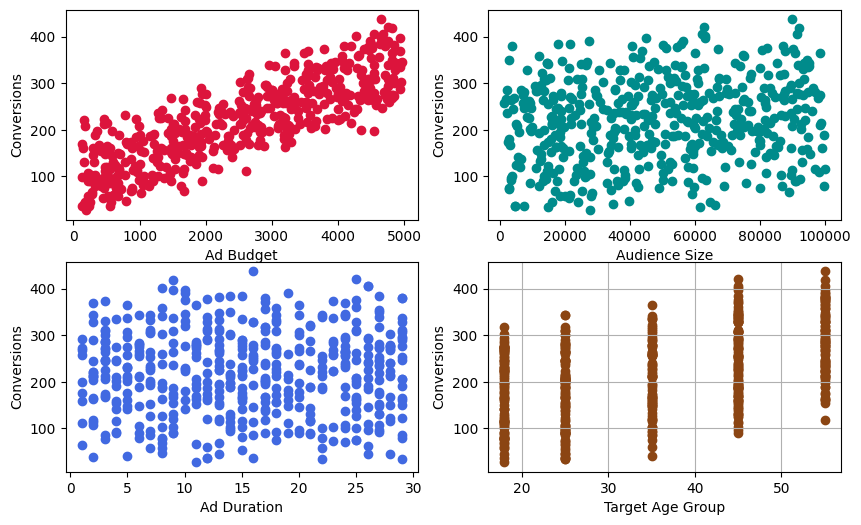

In [3]:
# Pair plot of numerical features
plt.rcParams["figure.figsize"] = (10,6) 

plt.subplot(2,2,1)
plt.scatter(df['Ad Budget'], df['Conversions'], c='#DC143C')
plt.xlabel("Ad Budget")
plt.ylabel("Conversions")

plt.subplot(2,2,2)
plt.scatter(df['Audience Size'], df['Conversions'], c='#008B8B')
plt.xlabel("Audience Size")
plt.ylabel("Conversions")

plt.subplot(2,2,3)
plt.scatter(df['Ad Duration'], df['Conversions'], c='#4169E1')
plt.xlabel("Ad Duration")
plt.ylabel("Conversions")

plt.subplot(2,2,4)
plt.scatter(df['Target Age Group'], df['Conversions'], c='#8B4513')
plt.xlabel("Target Age Group")
plt.ylabel("Conversions")
plt.grid()

#### Feature Selection and Engineering
------

In [4]:
# Selecting relevant features
features = ['Ad Budget', 'Audience Size', 'Ad Duration', 'Target Age Group', 
            'Platform_Facebook', 'Platform_Instagram', 'Platform_Twitter', 'Platform_TikTok',
            'Visual_Image', 'Visual_Video']

# Filter the dataset for selected features and target variable
df = df.reindex(columns=features + ['Conversions'])

# Drop rows with missing values for simplicity
df = df.dropna()
df.head()

,Ad Budget,Audience Size,Ad Duration,Target Age Group,Platform_Facebook,Platform_Instagram,Platform_Twitter,Platform_TikTok,Visual_Image,Visual_Video,Conversions
0,1935.246582,70118.009688,15,18,False,False,True,False,True,False,164.270027
1,4758.500101,54073.540268,12,45,True,False,False,False,False,True,339.760449
2,3686.770315,31643.234012,16,18,False,True,False,False,True,False,244.853616
3,3033.426573,81565.706951,24,45,False,True,False,False,False,True,263.226569
4,864.491338,68788.386083,19,45,False,True,False,False,True,False,173.777425


<span style="color: #663399; font-size: 15px; font-weight:bold;">Feature Encoding</span>

In [5]:
new_df = pd.DataFrame(df, columns=features + ['Conversions'])

from sklearn.preprocessing import LabelEncoder

# Fit and transform the categorical data
le = LabelEncoder()
new_df['Platform_Facebook'] = le.fit_transform(df['Platform_Facebook'])
new_df['Platform_Instagram'] = le.fit_transform(df['Platform_Instagram'])
new_df['Platform_Twitter'] = le.fit_transform(df['Platform_Twitter'])
new_df['Platform_TikTok'] = le.fit_transform(df['Platform_TikTok'])
new_df['Visual_Image'] = le.fit_transform(df['Visual_Image'])
new_df['Visual_Video'] = le.fit_transform(df['Visual_Video'])

In [6]:
new_df.head()

,Ad Budget,Audience Size,Ad Duration,Target Age Group,Platform_Facebook,Platform_Instagram,Platform_Twitter,Platform_TikTok,Visual_Image,Visual_Video,Conversions
0,1935.246582,70118.009688,15,18,0,0,1,0,1,0,164.270027
1,4758.500101,54073.540268,12,45,1,0,0,0,0,1,339.760449
2,3686.770315,31643.234012,16,18,0,1,0,0,1,0,244.853616
3,3033.426573,81565.706951,24,45,0,1,0,0,0,1,263.226569
4,864.491338,68788.386083,19,45,0,1,0,0,1,0,173.777425


##### - Permutation Feature Importances -
------

We have ten features (Ad Budget, Audience Size, Ad Duration, Target Age Group, Platform_Facebook, Platform_Instagram, Platform_Twitter, Platform_TikTok, Visual_Image, Visual_Video) to predict the response variable (Conversions). Based on the permutation feature importances shown in figure below, 'Ad Budget' is the most important feature, and 'Target Age Group' is the second most important feature". <br/>
Feature importances are obtained with rfpimp python library.

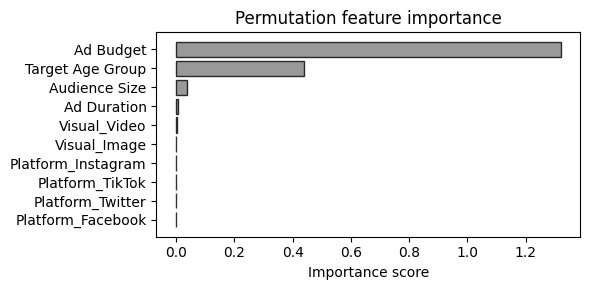

In [7]:
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train/test split 
df_train, df_test = train_test_split(new_df, test_size=0.20)

X_train, y_train = df_train.drop('Conversions',axis=1), df_train['Conversions']
X_test, y_test = df_test.drop('Conversions',axis=1), df_test['Conversions']

# Train
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

# Permutation feature importance
imp = rfpimp.importances(rf, X_test, y_test)

# Plot
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

##### - Visualize 2D bivariate linear regression model -
------

First, let's visualize 2D bivariate linear regression model, using 'Ad Budget' as a single feature. Although 'Ad Budget' is the most important feature regarding 'Conversions', 'Ad Budget' alone captured only 70% of variance of the data.

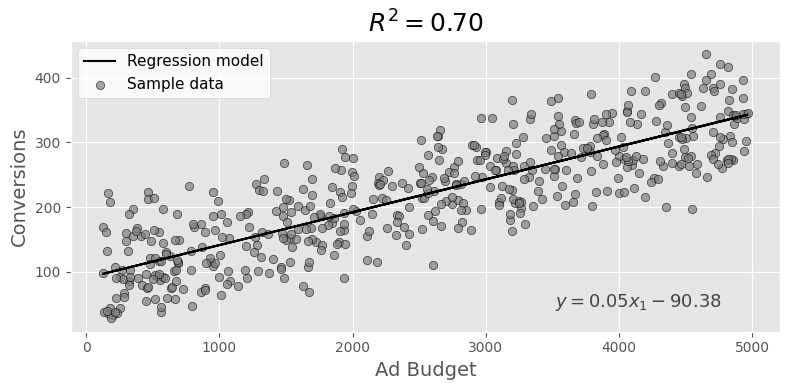

In [8]:
from sklearn import linear_model

X = new_df['Ad Budget'].values.reshape(-1,1)
y = new_df['Conversions'].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

r2 = model.score(X, y)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Conversions', fontsize=14)
ax.set_xlabel('Ad Budget', fontsize=14)
ax.text(0.8, 0.1, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='k', alpha=0.7)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

#### Creating Train and Test Dataset
------

In [9]:
import numpy as np
msk = np.random.rand(len(new_df)) < 0.8
train = new_df[msk]
test = new_df[~msk]

<span style="color: #663399; font-size: 15px; font-weight:bold;">Train data distribution</span>

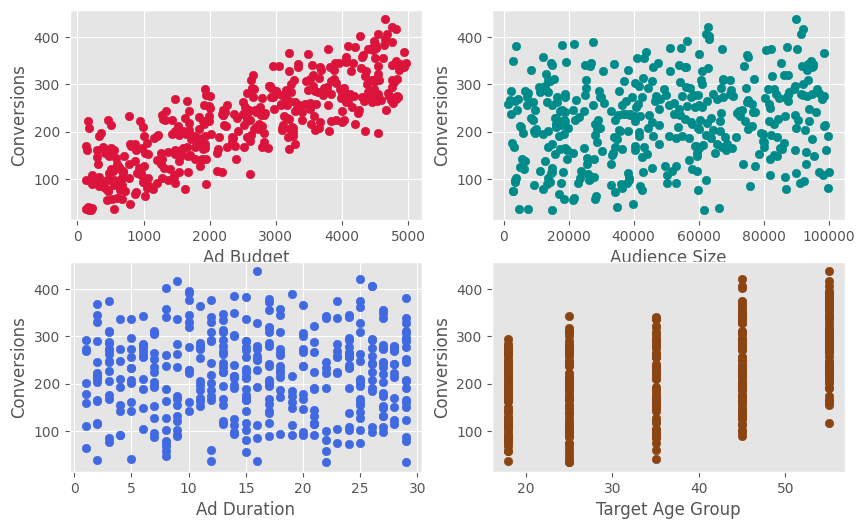

In [10]:
plt.rcParams["figure.figsize"] = (10,6) 

plt.subplot(2,2,1)
plt.scatter(train['Ad Budget'], train['Conversions'], c='#DC143C')
plt.xlabel("Ad Budget")
plt.ylabel("Conversions")

plt.subplot(2,2,2)
plt.scatter(train['Audience Size'], train['Conversions'], c='#008B8B')
plt.xlabel("Audience Size")
plt.ylabel("Conversions")

plt.subplot(2,2,3)
plt.scatter(train['Ad Duration'], train['Conversions'], c='#4169E1')
plt.xlabel("Ad Duration")
plt.ylabel("Conversions")

plt.subplot(2,2,4)
plt.scatter(train['Target Age Group'], train['Conversions'], c='#8B4513')
plt.xlabel("Target Age Group")
plt.ylabel("Conversions")
plt.grid()

### Multiple Regression Model
------
In reality, there are multiple variables that impact the Coefficients. When more than one independent variable is present, the process is called multiple linear regression.<br/>
We will declare six features: features = ['Ad Budget', 'Audience Size', 'Ad Duration', 'Target Age Group', 'Visual_Image', 'Visual_Video'].

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
features = ['Ad Budget', 'Audience Size', 'Ad Duration', 'Target Age Group',
            'Visual_Image', 'Visual_Video']
x = np.asanyarray(train[features])
y = np.asanyarray(train[['Conversions']])
regr.fit (x, y)
# The coefficients & intercept
print ('Coefficients: ', np.round(regr.coef_, 3))
print ('Intercept: ', np.round(regr.intercept_,3))

Coefficients:  [[ 5.000e-02  1.000e-03  6.660e-01  3.042e+00  8.927e+00 -8.927e+00]]
Intercept:  [-49.914]


<span style="color: #663399; font-size: 15px; font-weight:bold;">Prediction</span>

In [12]:
x_test = np.asanyarray(test[features])
y_test = np.asanyarray(test[['Conversions']])
y_hat = regr.predict(x_test)

mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % regr.score(x, y))

Mean Squared Error: 338.35502453037617
R-squared: 0.9626568028218273
Variance score: 0.94380


<span style="color: #663399; font-size: 15px; font-weight:bold;">Visualize the Results</span>

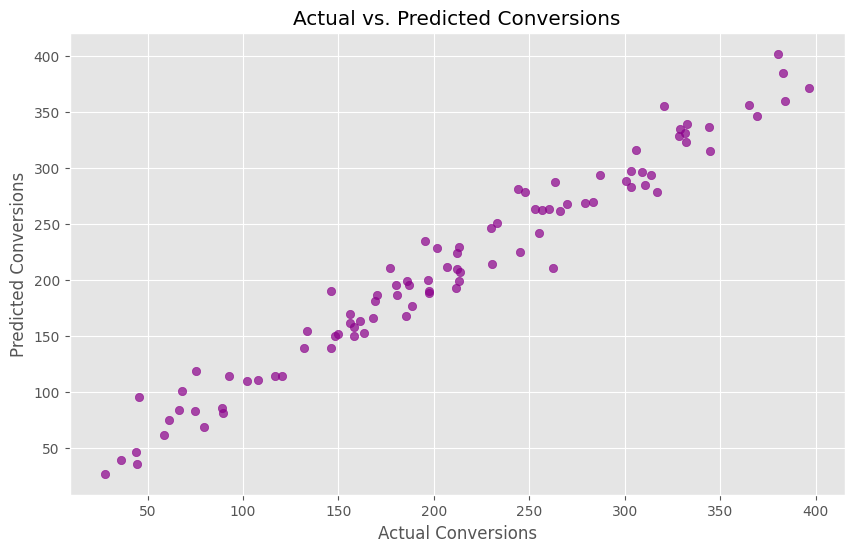

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_hat, c ="#8B008B", alpha=0.7)
plt.xlabel("Actual Conversions")
plt.ylabel("Predicted Conversions")
plt.title("Actual vs. Predicted Conversions")
plt.show()

<br/>
<span style="color: #191970; font-size: 16px; font-weight:bold;">Created by: Felice Benita</span>